## **1. Loading our Data**


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

#### **A quick check to see if we're using the GPU**

In [9]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3524529140056941485
xla_global_id: -1
]


## **2. Inspecting our dataset**

In [10]:
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


## **3. Visualizing our image dataset**


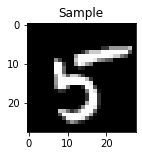

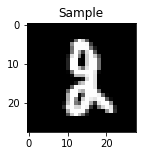

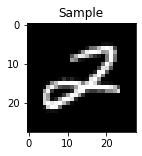

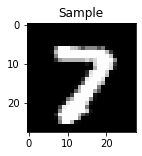

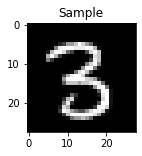

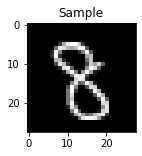

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")


for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

### **Let's do the same thing but using matplotlib to plot 6 images**

<Figure size 432x288 with 0 Axes>

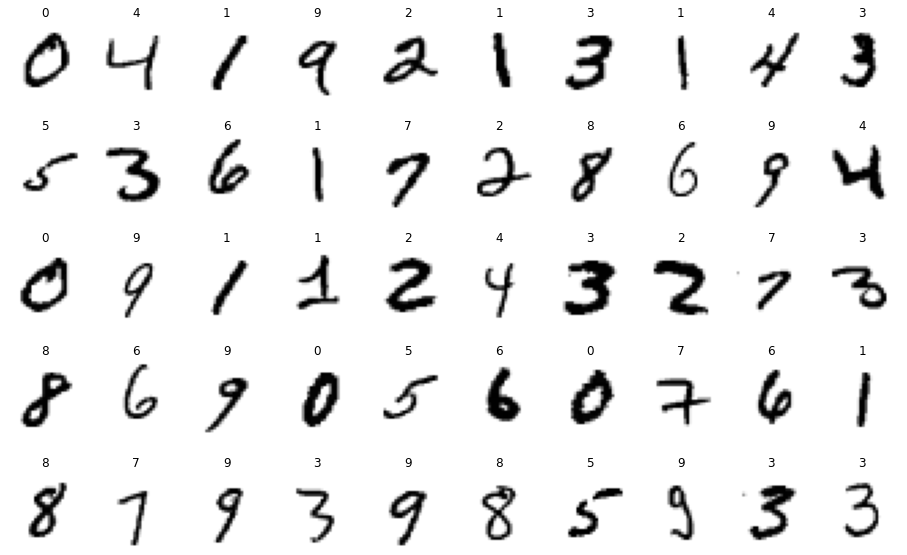

In [12]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

## **4. Preprocessing our dataset** 


In [13]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')


x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(img_rows, img_cols)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
28 28


#### **One Hot Encode Our Labels (Y)**


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

## **5. Building Our Model**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

## **6. Training our Model**


In [ ]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## **7. Ploting our Loss and Accuracy Charts**

In [ ]:

import matplotlib.pyplot as plt


history_dict = history.history


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(loss_values) + 1)


line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## **8. Saving and Loadng our Model**

In [ ]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

In [ ]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

##  **9. Getting Predictions from our sample Test Data**


In [ ]:
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

**Predicting an individual test image**

In [ ]:
input_im = x_test[0]
print(input_im.shape)

input_im = input_im.reshape(1,28,28,1) 
print(input_im.shape)

pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

### **Now let's do something fancy, let's put the predicted label on an image with the test data image**

In [ ]:
import cv2
import numpy as np


(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    draw_test("Prediction", res,  np.uint8(imageL)) 